<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
       Plotting with Teradataml Widgets
  <br>
       <img id="teradata-logo" src="https://storage.googleapis.com/clearscape_analytics_demo_data/DEMO_Logo/teradata.svg" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>

<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>Introduction</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The Teradataml Widgets (teradatamlwidgets) enhances teradataml’s built-in interaction capabilities with the Teradata Vantage™ Data and Analytics Platform. This provides  visual components for scaled, in-Database Analytics with data that you keep in the Teradata Vantage Analytics Database within a notebook.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>With these components, in a notebook you will be able to:</p>

<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>Access and execute analytic functions that reside in the Teradata Vantage Analytics Database. The functions are comprised by the following sets:</li>
    <ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
        <li>A select subset of the Analytics Database analytic functions.</li>
        <li>The entire Vantage Analytics Library (VAL) functions set.</li>
        <li>The Unbounded Array Framework (UAF) time series functions.</li>
    </ul>
</ul>

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Installing some dependencies</b>

In [1]:
# !pip install teradatamlwidgets ipywidgets --quiet

<div class="alert alert-block alert-info">
<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Note: </b><i>The above statements may need to be uncommented if you run the notebooks on a platform other than ClearScape Analytics Experience that does not have the libraries installed. If you uncomment those installs, be sure to restart the kernel after executing those lines to bring the installed libraries into memory. The simplest way to restart the Kernel is by typing zero zero: <b> 0 0</b></i></p>
</div>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Here, we import the required libraries, set environment variables and environment paths (if required).</p>

In [2]:
%load_ext autoreload
%autoreload 2
import sys
from teradatamlwidgets.plot.Login import *
from teradatamlwidgets.plot.ShowPlots import *
from teradatamlwidgets.plot.Ui import *
from teradataml import *

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>1. Initiate a connection to Vantage</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>First log into the database using the code: Login()</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>After running the notebook cell, a login screen shows. Once you type in the required information, click Login.</p>

<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li><code>Host</code>: host.docker.internal</li>
    <li><code>Username</code>: demo_user</li>
    <li><code>Password</code>: Enter your database password here</li>
    <li><code>Schema</code>: demo_user</li>
    <li><code>VALIB</code>: VAL</li>
</ul>

In [3]:
login = Login()

HBox()

Output()

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>2. Load Tables</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>In this example we will load some tables using teradataml. As we have already logged in, we can call teradataml load functions:</p>

In [4]:
# Load the example data.
load_example_data("teradataml", "titanic")
load_example_data("uaf", "house_values")
load_example_data("movavg", "ibm_stock")
load_example_data("uaf", ["waveletTable", "us_air_pass"])
load_example_data("teradataml", "iris_input")
load_example_data("geodataframe", ["sample_shapes"])
load_example_data("geodataframe", ["us_population", "us_states_shapes"])

<hr style="height:2px;border:none;background-color:#00233C;">
<div style="background-color:#f5f5f5;padding:10px;">
<p style="font-size:18px;font-family:Arial;color:#00233C;"><b>Plot Notebook Toolbar Button Functionality</b></p>

<ul style="font-size:16px;font-family:Arial;color:#00233C;">
    <li><b>Plot: </b>Click this button once you are ready to plot after choosing the appropriate desired values for the parameters.</li>
    <li><b>Log Out: </b>Click this button if you want to log out, which will take you to the login dialog.</li>
</ul>

<p style="font-size:18px;font-family:Arial;color:#00233C;"><b>Plot Notebook Tabs</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The parameters in the tabs are from the TD_PLOT function. Please refer to that documentation for the specifics of each parameter.</p>

<ul style="font-size:16px;font-family:Arial;color:#00233C;">
    <li><b>Chart: </b>This tab includes the X value of the input table and the Y values(s) which are the Series[0], Series[1] etc.</li>
    <ul style="font-size:15px;font-family:Arial;color:#00233C;">
        <li>Each time a Series is added, a new series option appears</li>
        <li>A tab is available for each series to customize</li>
    </ul>
    <li><b>Format: </b>This tab includes all the formatting specific parameters for the plot.</li>
    <ul style="font-size:15px;font-family:Arial;color:#00233C;">
        <li>Title, Heading, X-Label, Y-Label, and grid, color map and legend information</li>
    </ul>
    <li><b>Range: </b> Includes all the range specific parameters</li>
    <ul style="font-size:15px;font-family:Arial;color:#00233C;">
        <li>X-Ticks, Reverse X-Ticks, X Range (Min and Max)</li>
        <li>Y-Ticks, Reverse Y-Ticks, Y Range (Min and Max)</li>
    </ul>
    <li><b>Series Tab(s): </b>Each Series tab has same parameters which is specific to that series.</li>
    <ul style="font-size:15px;font-family:Arial;color:#00233C;">
        <li>Style color, Line Style, Line Width, Marker, Marker Size</li>
</div>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>There is “Chart Type” located at the top which provides list of all plot type options.</p>

<b style = 'font-size:18px;font-family:Arial;color:#00233C'>Choose Plot Type</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>You can choose the plot type before so that when the UI is run, it automatically has that plot type chosen. This is done by also including the plot type e.g. "Bar" in the constructor after the input table.
<br><br>
Below is a series of instructions for setting up example plots (based on teradataml documentation examples).
</p>

<b style = 'font-size:18px;font-family:Arial;color:#00233C'>Setting up the Plot Notebook : Optional Arguments</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Optionally, you can set up any of the parameters in the constructor itself. This way when running the cell, the UI gets populated with the pre-selected choices. Each parameter has an argument associated which is what would be used to set it in the constructor.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>You can see the argument for a given parameter by hovering over the parameter, this will give description of the parameter and at the end specifies the argument name.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>For example, below we see the Style Color parameter has argument: style, so in the constructor to set this to ‘green’ there is : 
style = ‘green’</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>This allows the UI to have that selection upon loading (i.e. when the notebook cell is run).
<br><br>
The examples below will use this in order to get the parameters to be filled with the appropriate values.</p>

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>3. Simple Line Plot</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>For the first plot below, we will do an example of a "Line" plot. This uses "ibm_stock" as the input table.</p>

<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>In the <i>Chart Tab</i>, choose "period" for <b>X</b> and "stockprice" for <b>Series[0]</b>.</li>
    <li>In the <i>Format Tab</i>, for the <b>Title</b> enter "Line Plot Example" and for the <b>Heading</b> enter "Simple Line Plot".</li> 
</ul>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Once you are done entering the parameters, click the green Plot button.</p>

In [5]:
plot1 = Ui(
    table_name = "ibm_stock",
    current_plot = "Line",
    x = 'period',
    series = 'stockprice',
    style = 'green',
    heading = 'Simple Line Plot',
    title = 'Line Plot Example'
)

HBox()

Output()

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>4. Simple Bar Plot</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>For the second plot below, we will do an example of a "Bar" plot. This uses "ibm_stock" as the input table.</p>

<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>In the <i>Chart Tab</i>, choose "period" for <b>X</b> and "stockprice" for <b>Series[0]</b>.</li>
    <li>In the <i>Format Tab</i>, for the <b>X Label</b> enter "xlabel" and for the <b>Y Label</b> enter "ylabel", for Heading enter “Simple Bar Plot”, and for Title enter “Bar Plot Example”</li>
    <li>In the <i>Range Tab</i>, for the <b>X Ticks</b> enter "MMM" and for the <b>Y Ticks</b> enter "9,99.99".</li>
    <li>In the <i>Series[0] Tab</i>, keep <b>Style Color</b> as "blue".</li>
</ul>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Once you are done entering the parameters, click the green Plot button.<p>

In [6]:
plot2 = Ui(
    table_name = "ibm_stock",
    current_plot = "Bar",
    x = 'period',
    series = 'stockprice',
    xlabel = 'xlabel',
    ylabel = 'ylabel',
    x_ticks = 'MMM',
    y_ticks = "9,99.99",
    style = 'blue', 
    heading = 'Simple Bar Plot',
    title = 'Bar Plot Example'
)

HBox()

Output()

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>5. Composite Bar Plot</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The plot below is an example of a Composite Bar chart. It uses "us_air_pass" as the input table.</p>

<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>In the <i>Chart Tab</i>, choose "idx" for <b>X</b> and "international" for <b>Series[0]</b> and "domestic" for <b>Series[1]</b>.</li>
    <li>In the <i>Format Tab</i>, for <b>Title</b> use "Bar Plot Example 2" and for <b>Heading</b> use "Composite Bar Plot".</li>
    <li>In <i>Series[0] Tab</i> the <b>Style Color</b> is kept to the default of blue. But for <i>Series[1] Tab</i> change <b>Style Color</b> to "orange".</li>
</ul>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Once you are done entering the parameters, click the green Plot button.<p>

In [7]:
plot3 = Ui(
    table_name = "us_air_pass",
    current_plot = "Bar",
    x = 'idx',
    series = ['international','domestic'],
    style = ['blue', 'orange'],
    heading = 'Composite Bar Plot',
    title = 'Bar Plot Example 2'
)

HBox()

Output()

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>6. Scatter Plot</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The plot below is an example of a Scatter plot. It uses "iris_input" as the input table.</p>

<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>In the <i>Chart Tab</i>, for <b>X</b> choose "sepal_length" and for <b>Series[0]</b> choose "petal_length".</li>
    <li>In the <i>Format Tab</i>, for <b>Title</b> enter "Scatter Plot of sepal_length vs petal_length", set <b>Heading</b> to “Scatter Plot Example”, <b>X Label</b> to "sepal_length" and the <b>Y Label</b> to “petal_length”, set <b>Grid Color</b> to “black”, and set <b>Grid Width</b> to 1.</li>
    <li>In <i>Series[0] Tab</i>, keep <b>Style Color</b> as "blue".</li>
</ul>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Once you are done entering the parameters, click the green Plot button.</p>

In [8]:
plot4 = Ui(
    table_name = "iris_input",
    current_plot = "Scatter",
    x = 'sepal_length',
    series = 'petal_length',
    xlabel = 'sepal_length',
    ylabel = 'petal_length',
    grid_color = 'black',
    grid_linewidth = 1,
    grid_linestyle = "-",
    style = 'blue', 
    title = 'Scatter Plot of sepal_length vs petal_length',
    heading = 'Scatter Plot Example'
)

HBox()

Output()

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>7. Mesh Plot</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Below is an example of a Mesh Plot, we use "waveletTable" as the input table.</p>

<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>In the <i>Chart Tab</i>, set <b>X</b> to "x", <b>Scale</b> to "c", and <b>Series[0]</b> to "y".</li>
    <li>In the <i>Format Tab</i>, set <b>Title</b> to “Mesh Plot Example”, set <b>Heading</b> to “Simple Mesh Plot”, set <b>Color Map</b> to "ice", and set the <b>Min</b> to -0.5 and <b>Max</b> to 0.5.</li>
</ul>

In [9]:
plot5 = Ui(
    table_name = "waveletTable",
    current_plot = "Mesh",
    x = 'x',
    scale = "c",
    series = 'y',
    vmin = -0.5,
    vmax = 0.5,
    cmap = "ice",
    title = 'Mesh Plot Example',
    heading = 'Simple Mesh Plot'
)

HBox()

Output()

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>8. Wiggle Plot</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Below is an example of a Wiggle Plot, we use "waveletTable" as the input table.</p>

<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>In the <i>Chart Tab</i>, set <b>X</b> to "x", <b>Scale</b> to "c", and <b>Series[0]</b> to "y".</li>
    <li>In the <i>Format Tab</i>, set <b>Title</b> to “Wiggle Plot Example” and <b>Heading</b> to “Simple Wiggle Plot”</li>
</ul>

In [10]:
plot6 = Ui(
    table_name = "waveletTable",
    current_plot = "Wiggle",
    x = 'x',
    scale = "c",
    series = 'y',
    title = 'Wiggle Plot Example',
    heading = 'Simple Wiggle Plot'
)

HBox()

Output()

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>9. Geometry Plot</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Below is an example of a Geometry Plot, below loads the table and join shapes with population and filter only 1990 data.</p>

In [11]:
shapes_df = GeoDataFrame("sample_shapes")
us_states_shapes = GeoDataFrame("us_states_shapes")
DataFrame("us_population")

state_name,location_type,population_year,population
Arkansas,State,1910,1574449.0
Colorado,State,1910,799024.0
Connecticut,State,1910,1114756.0
Delaware,State,1910,202322.0
Florida,State,1910,752619.0
Georgia,State,1910,2609121.0
District of Columbia,State,1910,331069.0
California,State,1910,2377549.0
Arizona,State,1910,204354.0
Alaska,State,1910,64356.0


In [12]:
population_data = us_states_shapes.join(
    DataFrame("us_population"),
    on = DataFrame("us_population").state_name == us_states_shapes.state_name,
    lprefix = "us",
    rprefix = "t2"
)
population_data = population_data.select(["us_state_name", "state_shape", "population_year", "population"])

In [13]:
# Generate the geometry plot to show the density of population across the US states in year 1990.
population_data_1990 = population_data[population_data.population_year == 1990]

<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>In the <i>Chart Tab</i>, set <b>X</b> to "population_year" and <b>Series[0]</b> to "population".</li>
    <li>In the <i>Format Tab</i>, set <b>Title</b> to "Population Density across the US in 1990", set <b>Heading</b> to “Map Plot Example”, set <b>Color Map</b> to "rainbow", and <b>Width</b> to 800.</li>
    <li>In the <i>Range Tab</i>, set <b>Reverse Y Ticks</b> to True.</li>

In [14]:
plot7 = Ui(
    df = population_data_1990,
    current_plot = "Geom",
    series = 'population',
    title = 'Population Density across the US in 1990',
    reverse_yaxis =  True,
    cmap = 'rainbow',
    width = '800',
    heading = 'Map Plot Example'
)

HBox()

Output()

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>10. Subplot</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Below is the code to have subplots i.e. show multiple plots together. This is a way of showing the plots created previously. It uses the function .ShowPlots() to do this.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>ShowPlots takes in the plots wanting to be displayed in a list, and then has nrows for how many rows and ncols for how many columns. It also has a grid parameter which lets you specify which positioning you desire for the plots.</p>

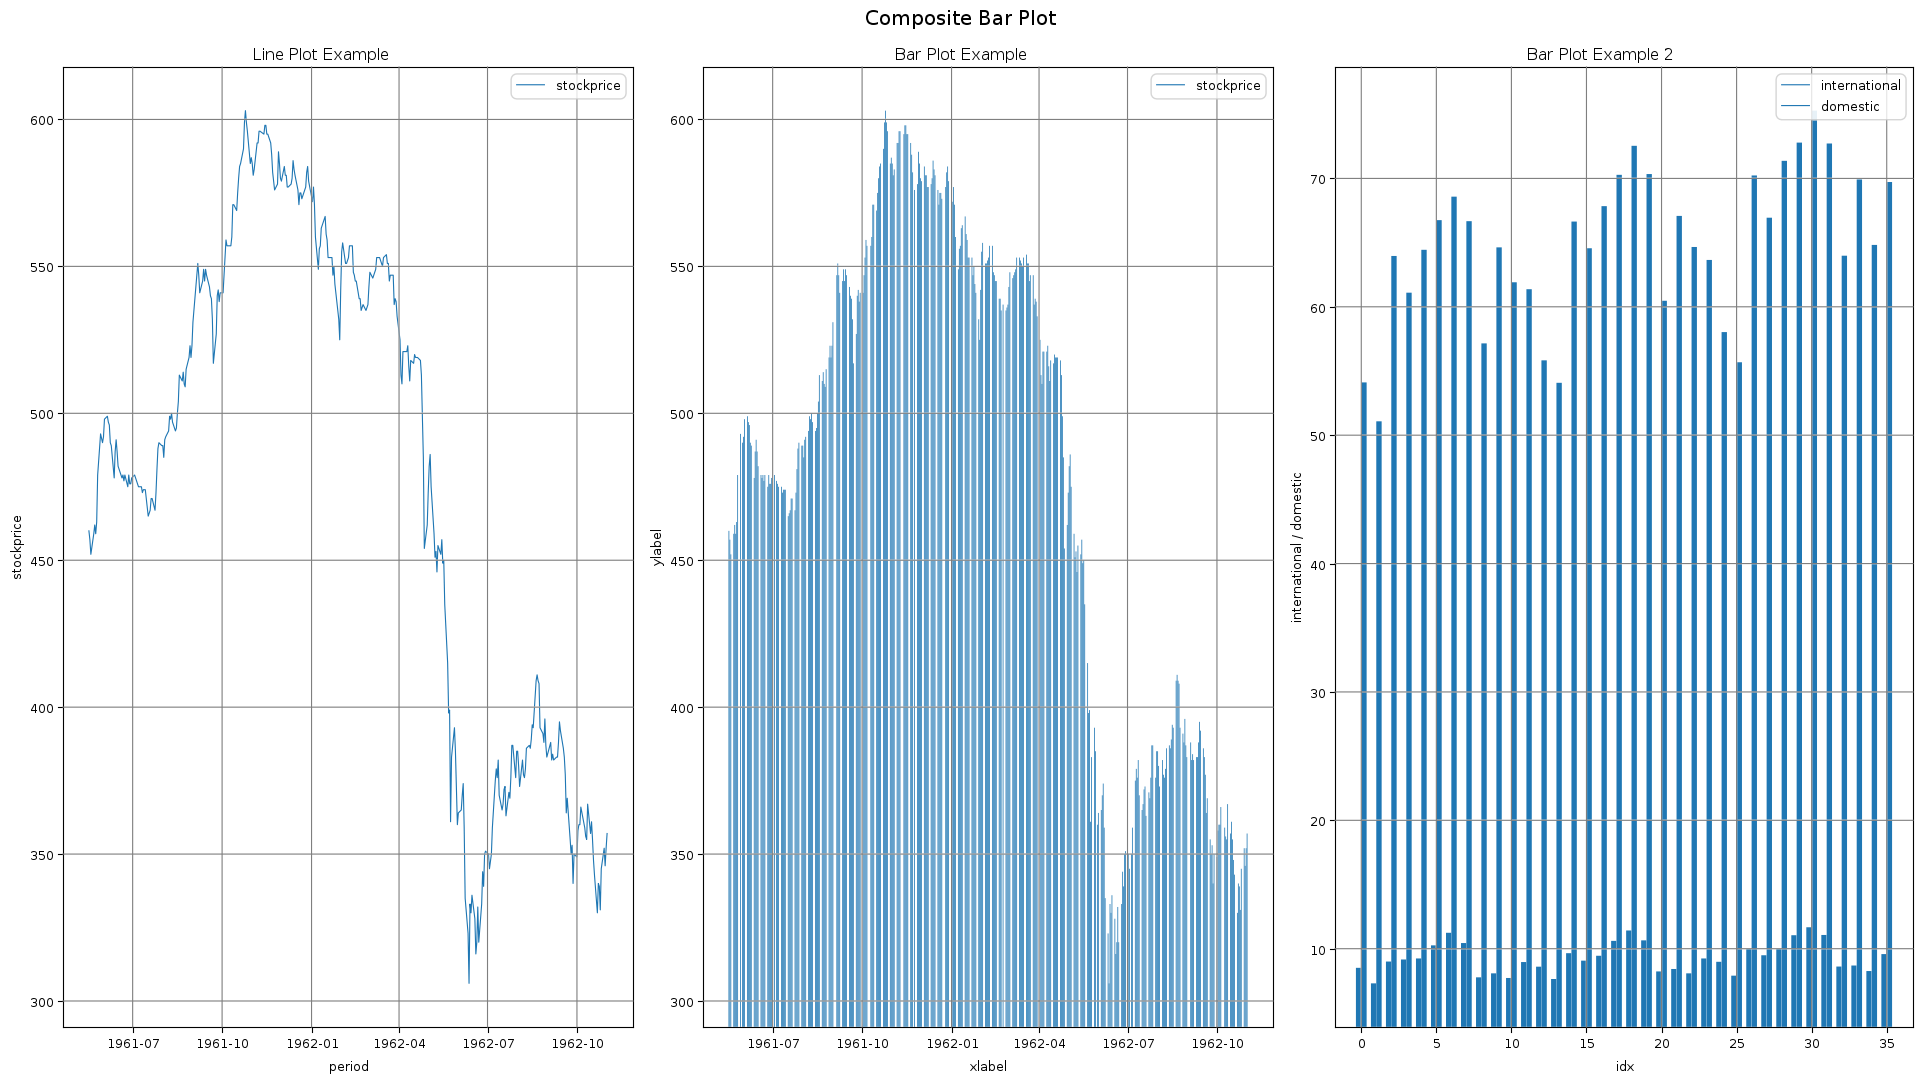

In [15]:
ShowPlots([plot1, plot2, plot3], nrows = 1, ncols = 3)

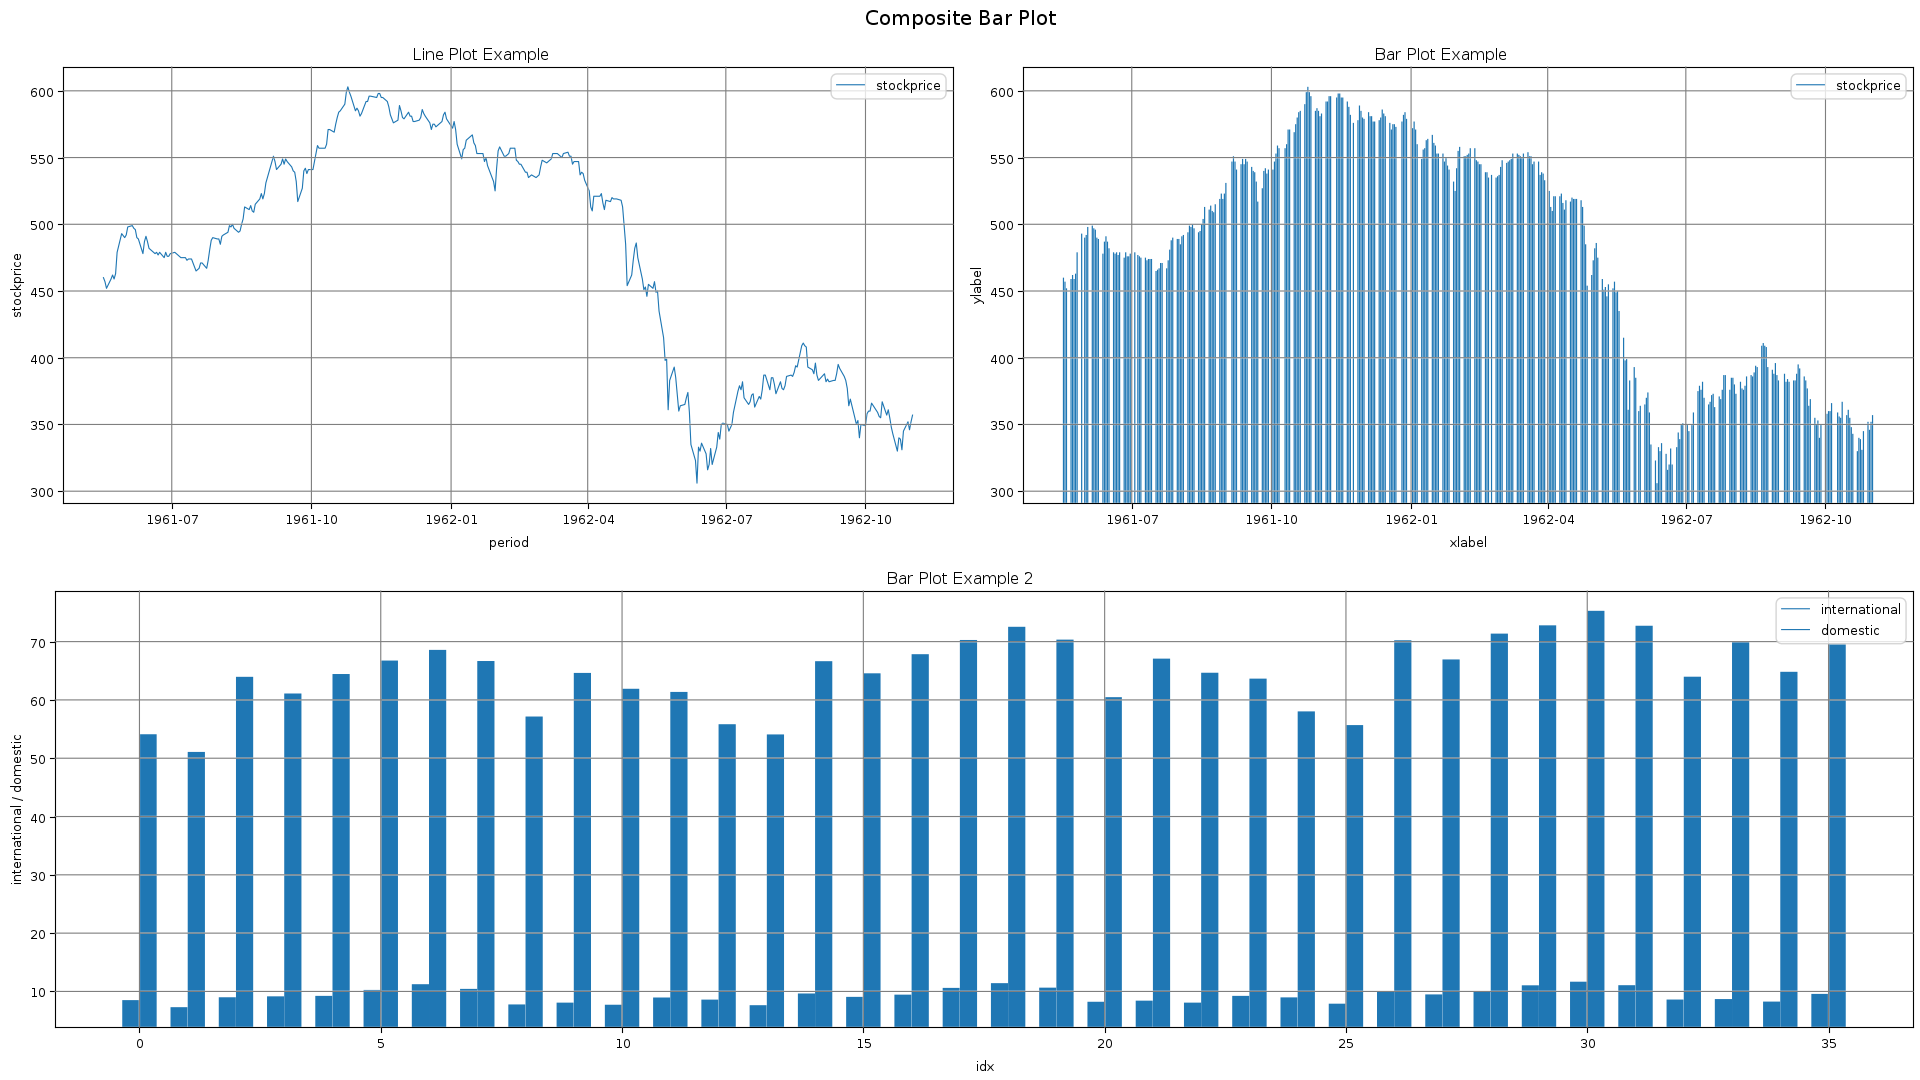

In [16]:
ShowPlots([plot1, plot2, plot3], grid = {(1, 1): (1, 1), (1, 2): (1, 1), (2, 1): (1, 2)})

<hr style="height:2px;border:none;background-color:#00233C;">

<div style="background-color:#f5f5f5;padding:10px;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>Class: plot.Ui</b>
<br><br>

<b style = 'font-size:18px;font-family:Arial;color:#00233C'>Constructor</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Description: Opens the Plot UI dialog in the notebook with the following arguments:</p>

<table border="1" style="border-collapse:collapse; font-family:Arial; color:#00233C;">
  <tr>
    <th>Argument</th>
    <th>Type</th>
    <th>Required</th>
    <th>Description</th>
    <th>Example</th>
  </tr>
  <tr>
    <td>table_name</td>
    <td>String</td>
    <td>Mandatory (IF df argument not specified)</td>
    <td>An input table name to use for plotting.</td>
    <td>Ui(table_name = "titanic")</td>
  </tr>
  <tr>
    <td>df</td>
    <td>teradataml.DataFrame</td>
    <td>Mandatory (IF table_name argument not specified)</td>
    <td>An input teradataml dataframe to use for plotting.</td>
    <td>Ui(df = DataFrame("titanic"))</td>
  </tr>
  <tr>
    <td>current_plot</td>
    <td>String</td>
    <td>Optional</td>
    <td>If you want a chart type pre-selected.</td>
    <td>Ui(table_name = "titanic", current_plot = "Bar")</td>
  </tr>
  <tr>
    <td><i>all other parameter arguments</i></td>
    <td></td>
    <td>Optional</td>
    <td>If you want any other parameters pre-selected, see their argument name in the description.</td>
    <td>Ui(table_name = "titanic", current_plot = "Bar", style='green')</td>
  </tr>
</table>
</div>

<footer style="padding-bottom:35px; background:#f9f9f9; border-bottom:3px solid #00233C">
    <div style="float:left;margin-top:14px">ClearScape Analytics™</div>
    <div style="float:right;">
        <div style="float:left; margin-top:14px">
            Copyright © Teradata Corporation - 2024. All Rights Reserved
        </div>
    </div>
</footer>